# CLUSTERING


## MALL CUSTOMERS SEGMENTATION

### TECHNICAL GOALS

### 
* Unterstand the data very well.Do all transformation / data engineering / etc.wherever applicable.
* Perform Exploratory Data analysis (EDA).
* Carry out all the data mining tasks.
* Identify the salient features that will determine the best results.
* Perform the model evaluation to select the appropriate algorithms.

### Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import The Data 

In [2]:
data=pd.read_csv("Proj3_MallCustomers_Data_Project.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Here we have the following features :
* CustomerID: It is the unique ID given to a customer
* Gender: Gender of the customer
* Age: The age of the customer
* Annual Income(k$): It is the annual income of the customer
* Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the    8   behavior of the customer.

### Data Preparation

### Understanding data structure

### All columns

In [3]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### structure of dataset

In [4]:
data.shape

(200, 5)

In [5]:
data.size

1000

### Summary of dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


#### 
* Count : Shows the total number.
* Mean : Shows the average.
* Std : Standard deviation value
* Min : Minimum value
* %25 : First Quantile
* %50 : Median or Second Quantile
* %75 : Third Quantile
* Max : Maximum value

In [8]:
data.describe(include = 'object').T

,count,unique,top,freq
Gender,200,2,Female,112


### data types

In [9]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Checking  null values

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### There is no null values present in the dataset so, we do not need null value treatment .

### Data Correlation

In [11]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [12]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [13]:
import seaborn as sns

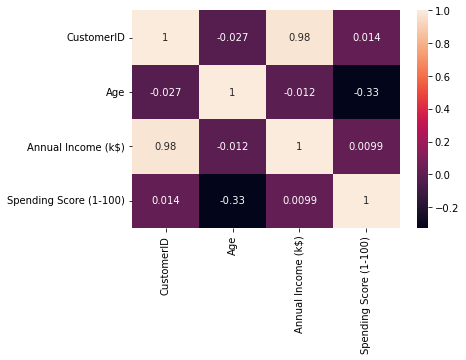

In [14]:
sns.heatmap(data.corr(),annot=True)
plt.show()

####   CustomerID  does not have any significant effect on our target feature and age , and annual income has significant role on our target feature that is spending score.

### Dropping CustomerID

In [15]:
data.drop('CustomerID',axis=1,inplace=True)

In [16]:
data.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


## Count of each columns or feature in the data set

### Gender unique categories

In [17]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [18]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Visualization of gender unique categories and count.

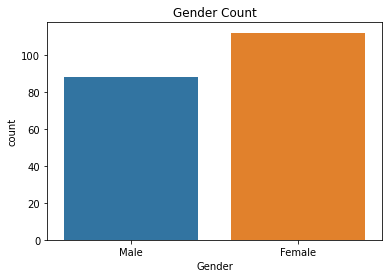

In [19]:
sns.countplot(data.Gender)
plt.title('Gender Count')
plt.show()

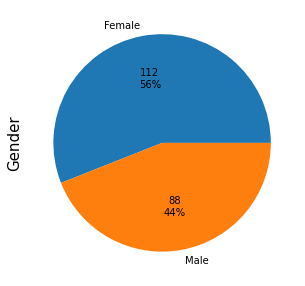

In [20]:
labels=data['Gender'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Gender']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Gender', size=15)
# show plot
plt.show()

####  There is two categories of gender that is male and female and the count for female is 122 and the count for male is 88 and in percentage the female is 56% and male is 44%.So we say that females are visiting malls more than male.

## Boxplot of gender as per there annual  income segment

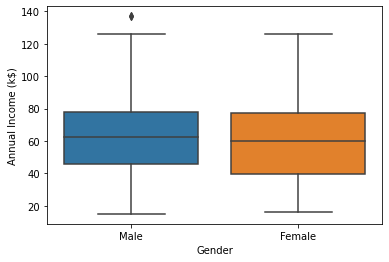

In [21]:
sns.boxplot(data=data, x='Gender', y='Annual Income (k$)');

#### The average income for male and female is same that is 60 but there is one outlier in the male whose income is quite high from the other male custo

## Age unique categories

In [22]:
data.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [23]:
data.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

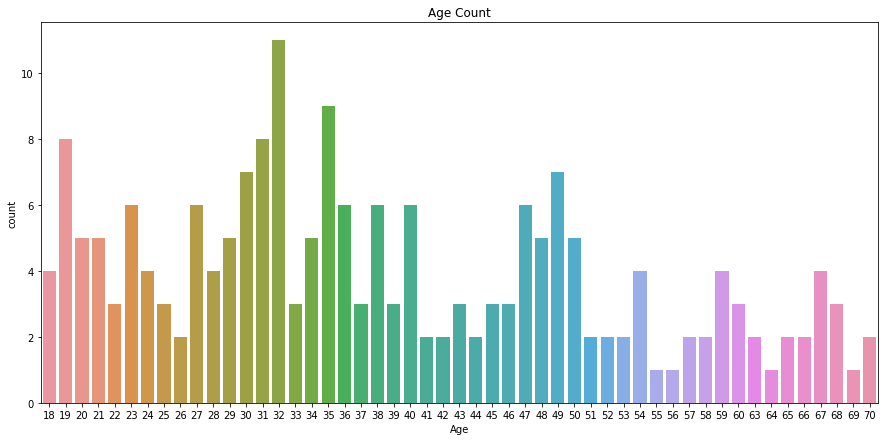

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(data.Age)
plt.title('Age Count')
plt.show()

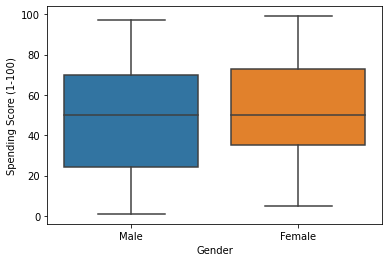

In [25]:
sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)');

#### By looking It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

## Income unique categories

In [26]:
data['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [27]:
data['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

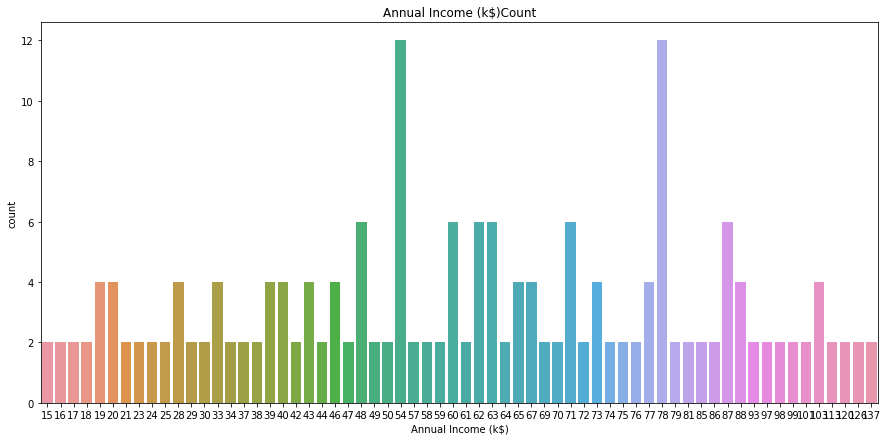

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(data['Annual Income (k$)'])
plt.title('Annual Income (k$)Count')
plt.show()

#### The annual income is from 15 to 137.

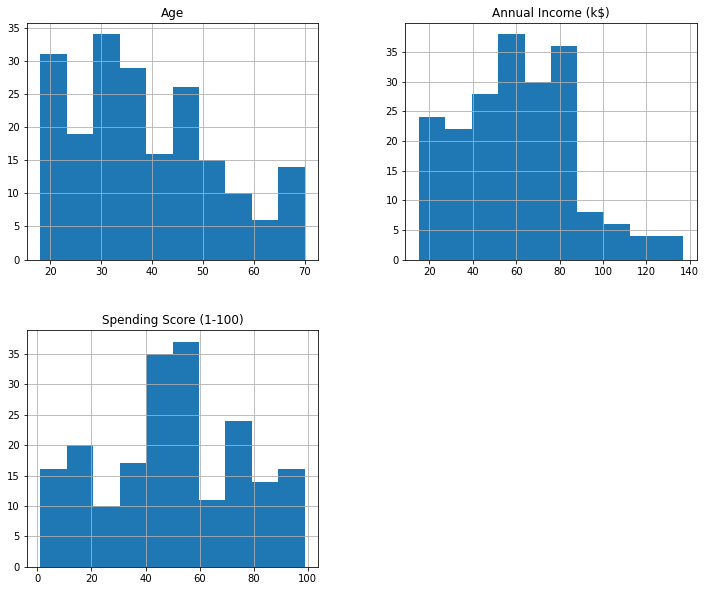

In [29]:
data.hist(figsize=(12,10))
plt.title('All Data  Histogram ')
plt.show()

#### 
* The average age is ranging from 30 to 50.
* The average income is ranging from 50 to 85.
* The average spending score is ranging from 40 to 80

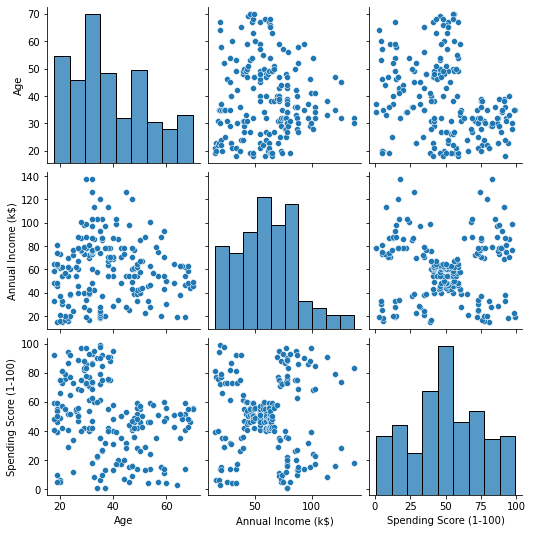

In [30]:
sns.pairplot(data[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

#### We can see the spending score and annual income is making 5 clusters.

## plotting  the scatter plot of the given data

###  Age VS Spending score

Text(0, 0.5, 'Spending Score')

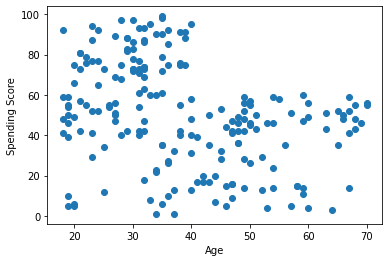

In [31]:
plt.scatter('Age','Spending Score (1-100)',data=data)
plt.xlabel('Age')
plt.ylabel('Spending Score')

#### We can clearly  say which age group spending score is high or low.People between the ages of 20-40 have made more purchases

### Annual income VS spending score

Text(0, 0.5, 'Spending Score')

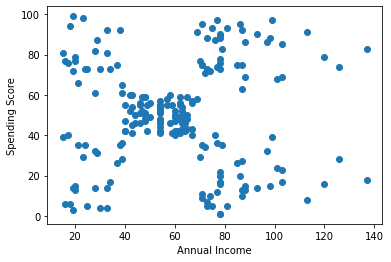

In [32]:
plt.scatter('Annual Income (k$)','Spending Score (1-100)',data=data)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

#### We can see the behaviour of Customers with Annual Income and their Spending Score. The plot shows segments of Customers with following behaviours :

* Low Income- Low Spending Score
* High Income- Low Spending Score
* Low Income- High Spending Score
* High Income- High Spending Score
* Moderate Income- Moderate Spending Score

### Boxplot

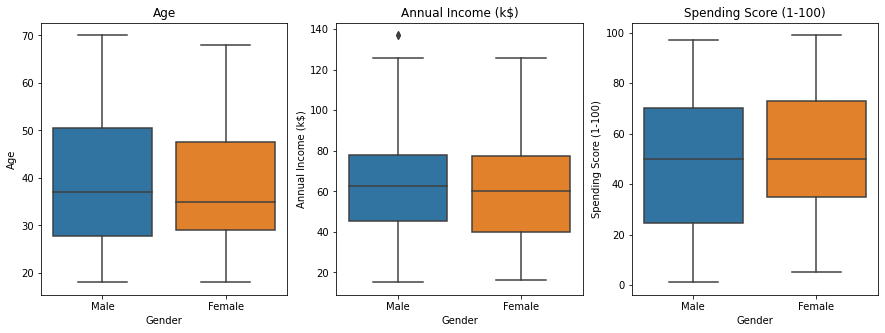

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.boxplot(x=data.Gender, y=data.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=data.Gender, y=data['Annual Income (k$)'])
plt.title('Annual Income (k$)')

plt.subplot(1,3,3)
sns.boxplot(x=data.Gender, y=data['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')

plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

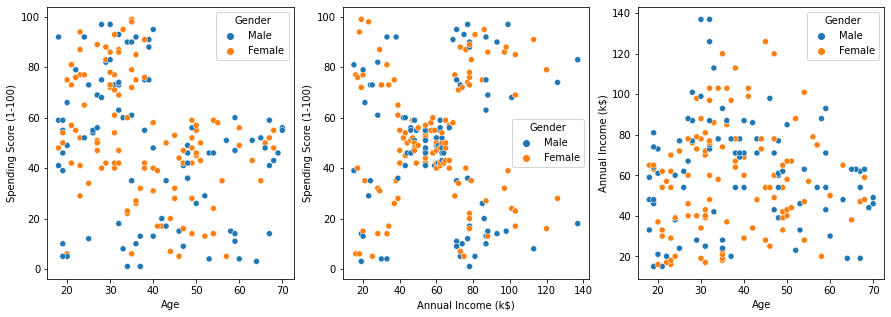

In [34]:
#scatter plot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x=data.Age,y=data['Spending Score (1-100)'],hue=data.Gender)

plt.subplot(1,3,3)
sns.scatterplot(x=data.Age,y=data['Annual Income (k$)'],hue=data.Gender)

plt.subplot(1,3,2)
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=data.Gender)

## Converting the object into categorical type

In [35]:
data['Gender']=data['Gender'].astype("category")

## Label encoder

In [36]:
from sklearn import preprocessing

In [37]:
label_encoder=preprocessing.LabelEncoder()

In [38]:
data['Gender']=label_encoder.fit_transform(data['Gender'])

## Scaling the dataset

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
scaled_df=scaler.fit_transform(data)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [42]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]

In [43]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Cluster Analysis

### Finding  the Number of Cluster

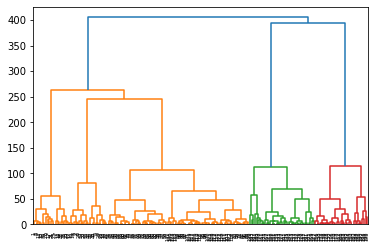

In [44]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(x,method='ward'))


#### From the above graph we can see that optimal number of custer will be 5.

## Finding the optimal number of cluster using Elbow method

### Determining K-value using elbow method

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

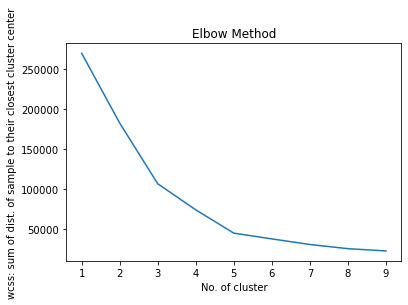

In [45]:
from sklearn.cluster import KMeans
EM=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(x)
    EM.append(kmeans.inertia_)
    
plt.plot(range(1,10),EM)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

#### From elbow method also, the optimal number of cluster will be 5.

## Finding the optimum value of K and cluster efficiency using Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395


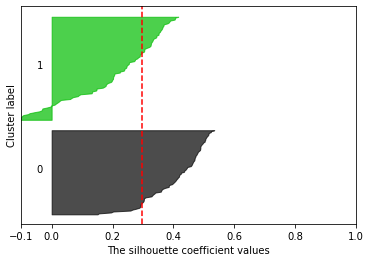

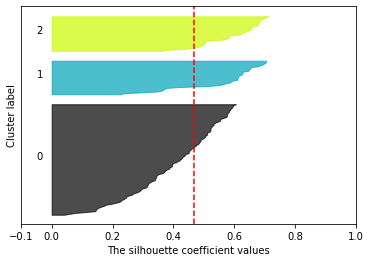

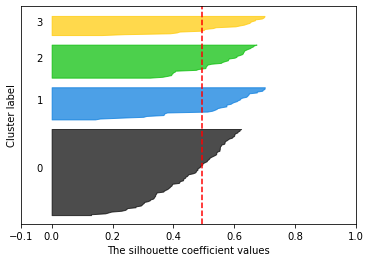

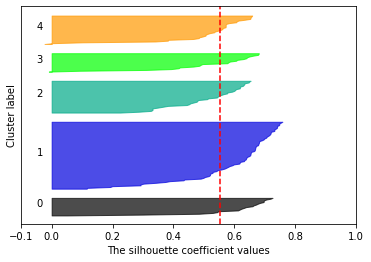

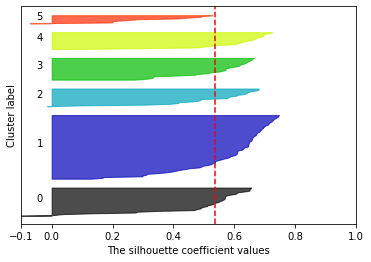

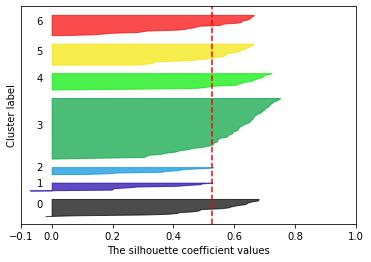

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)
    
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7)
 # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


#### From silhouette , the optimal number of cluster is also 5.

## KMeans Clustering Model with 5 cluster

### creating object kmeans of class KMeans()

In [47]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [49]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans
# it tells which data point belongs to which cluster (0,1,2,3,4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Visualising the cluster

In [51]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [52]:
from sklearn.cluster import KMeans 

In [53]:
X_numerics = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

In [54]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

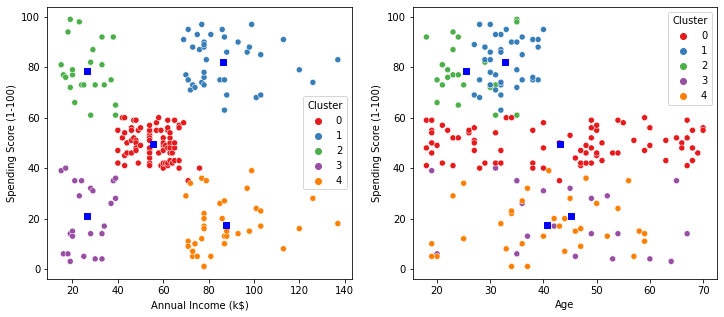

In [55]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

#### K-Means algorithm generated the following 5 clusters:

* clients with low annual income and high spending score
* clients with medium annual income and medium spending score
* clients with high annual income and low spending score
* clients with high annual income and high spending score
* clients with low annual income and low spending score
* There are no distinct groups is terms of customers age.

## Hierarchical Clustering Model Building

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

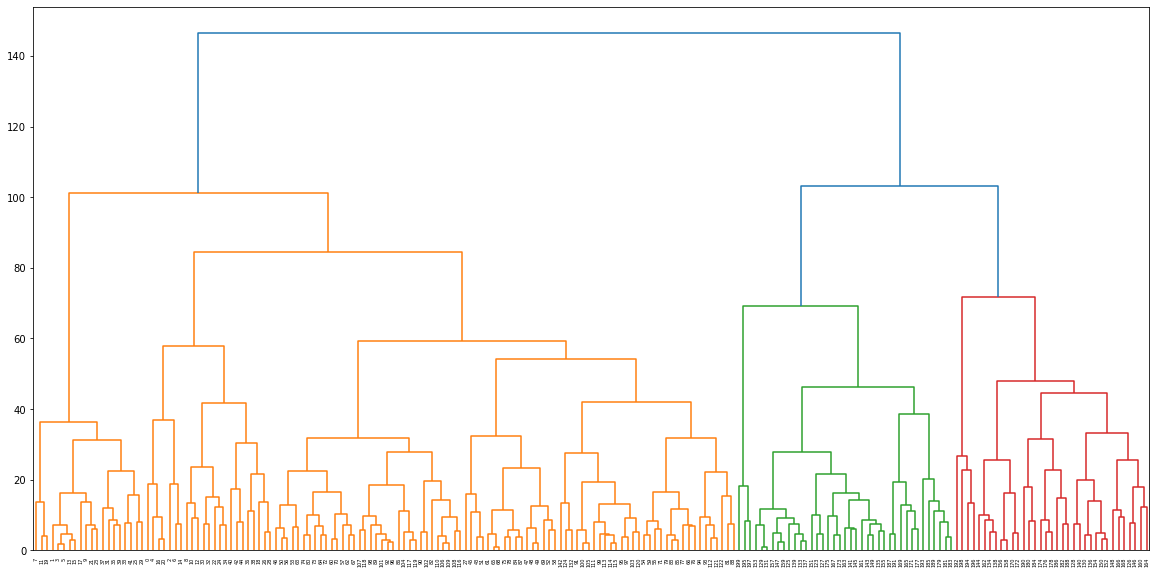

In [58]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(data, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

#### We will opt for 4 as cluster

In [59]:
# 4 clusters
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [60]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [61]:
# Assign the label

data['Clusters'] = cluster_labels
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


In [62]:
data.Clusters.unique()

array([0, 1, 2, 3])

In [63]:
## Number of customers in each cluster
data['Clusters'].value_counts(ascending=True)

1     20
3     35
2     39
0    106
Name: Clusters, dtype: int64

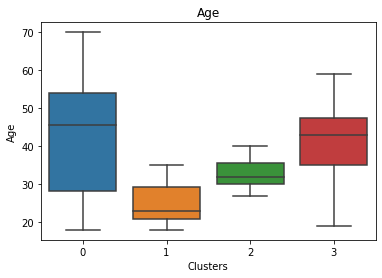

In [64]:
# plot
plt.title('Age')
sns.boxplot(x='Clusters', y='Age', data=data)
plt.show()

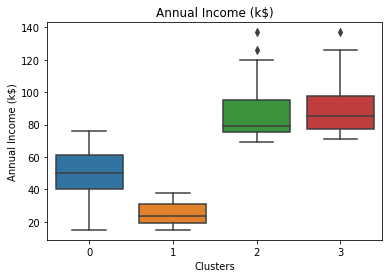

In [65]:
# plot
plt.title('Annual Income (k$)')
sns.boxplot(x='Clusters', y='Annual Income (k$)', data=data)
plt.show()

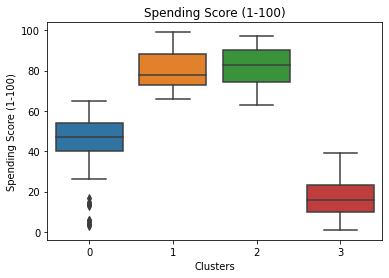

In [66]:
# plot
plt.title('Spending Score (1-100)')
sns.boxplot(x='Clusters', y='Spending Score (1-100)', data=data)
plt.show()

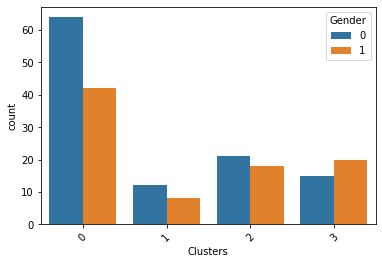

In [67]:
sns.countplot(data=data, hue='Gender', x='Clusters').tick_params(axis='x', rotation = 45)

#### 
* 0 stands for female customers.
* 1 stands for male customers.

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
# creating object hc of class AgglomerativeClustering()
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [70]:
# it gives an array which tells as to which data point belongs to which cluster (0,1,2,3)
y_hc=hc.fit_predict(x)

In [71]:
y_hc

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [72]:
y_hc.astype

<function ndarray.astype>

In [73]:
# converting x into ndarray to avoid errors
x=np.array(x)

In [74]:
x.astype

<function ndarray.astype>

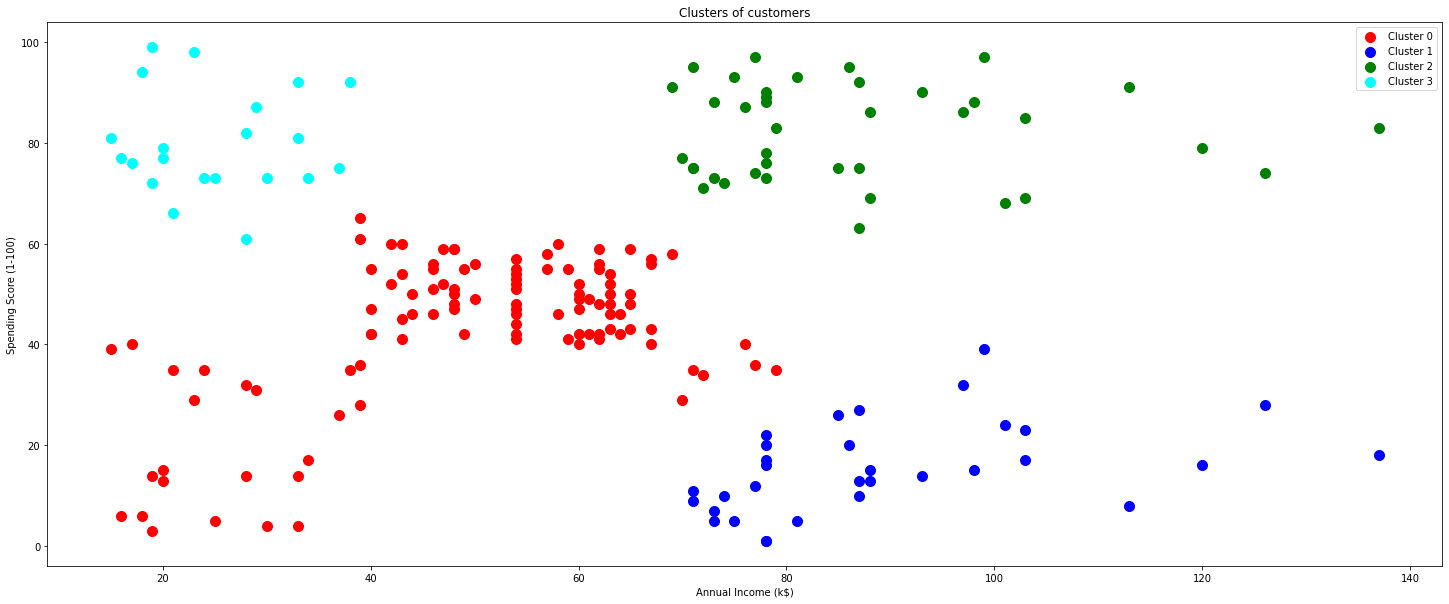

In [75]:
# Visualising the clusters
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


#### Interpretation:
* Cluster 0 belong to Low Income and High Spending score people who are mostly young aged.
* Cluster 1 belong to Average Income and Average Spending score people who are mostly old aged.
* Cluster 2 belong to High Income and High Spending score people who are at their 30s.
* Cluster 3 belongs to High Income and low spending score people who are mid aged.

#### Conclusion

* Target Cluster 1 with more offers
* Reward Cluster 2 people for being loyal customer.
* Improve the services to attract Cluster 3
* Target Cluster 0 with better employees support

## DB-SCAN CLUSTERING MODEL

### (Density Based Spacial Clustering of Applications with noise)

In [76]:
## Applying DBSCAN algorithm with Hyperparameters to cluster the data

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(data[['Annual Income (k$)','Spending Score (1-100)']])


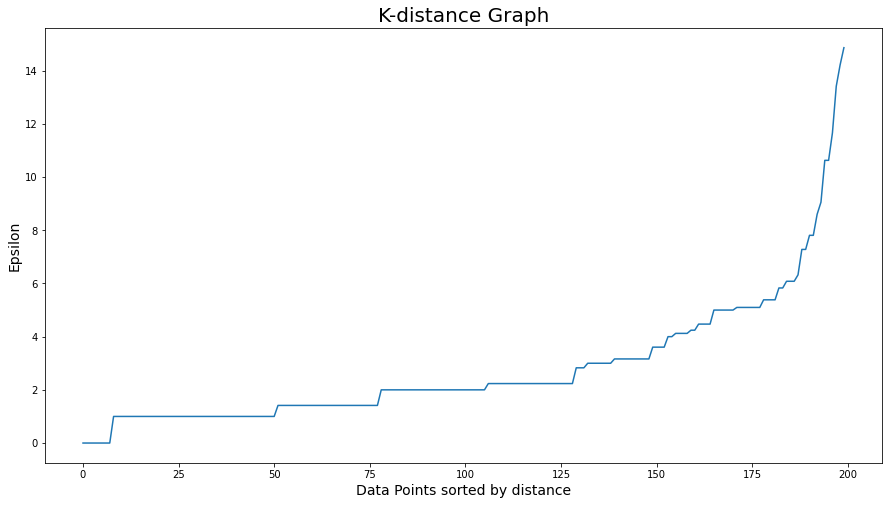

In [77]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y=0.075, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [78]:
###### we can see we got approximately epsilon value as 3

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(data[['Annual Income (k$)','Spending Score (1-100)']])

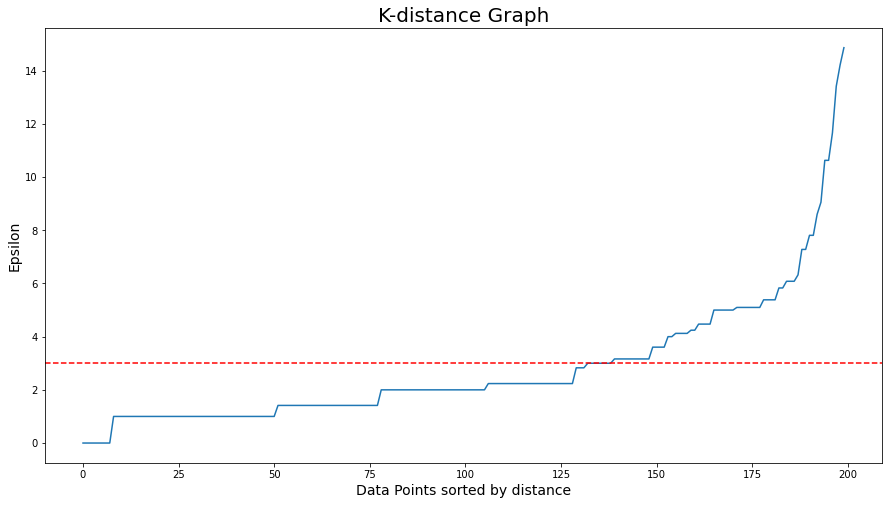

In [79]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
eps=10
for min_samples in [5,6,7,8,9,10]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(data)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 10 | min_samples=  5 | obtained clustering:  [(1, 69), (2, 15), (3, 79), (4, 32), (5, 5)]
eps= 10 | min_samples=  6 | obtained clustering:  [(1, 82), (2, 12), (3, 77), (4, 29)]
eps= 10 | min_samples=  7 | obtained clustering:  [(1, 90), (2, 10), (3, 43), (4, 23), (5, 6), (6, 28)]
eps= 10 | min_samples=  8 | obtained clustering:  [(1, 103), (2, 10), (3, 40), (4, 21), (5, 26)]
eps= 10 | min_samples=  9 | obtained clustering:  [(1, 109), (2, 9), (3, 25), (4, 10), (5, 21), (6, 26)]
eps= 10 | min_samples=  10 | obtained clustering:  [(1, 122), (2, 10), (3, 21), (4, 21), (5, 14), (6, 12)]


In [93]:
import matplotlib.pyplot as plt

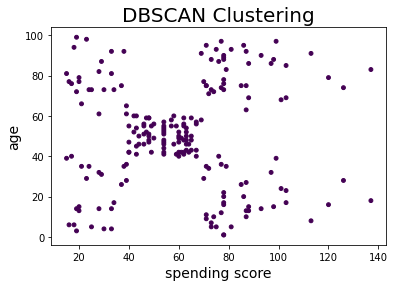

In [97]:
import matplotlib
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

data['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=data['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('spending score',fontsize=14)
plt.ylabel('age',fontsize=14)
plt.show()

#### We are getting five clusters in dbscan also
* Customer in the age group of 40 to 60 are spending more.

## Conclusion- For this particular problem i will go with the hierarical clustering because it is giving me the clear picture about the clusters so we can target our customer accordingly.
* Target Cluster 1 with more offers
* Reward Cluster 2 people for being loyal customer.
* Improve the services to attract Cluster 3
* Target Cluster 0 with better employees support